# 機械システム工学実験　テーマI　レポート課題

<font color="red">
（TODO） 以下の伏せ字（X）を各自で変更せよ．変更したらこの赤字の記述を削除せよ．
</font>

- 実験日（第1週）: 202X年X月X日
- レポート提出日: 202X年X月X日
- 実験班: X班
- 学籍番号: XXXXXXX
- 氏名: XXX XXX

## 注意

- このnotebookを実行する前に，このnotebookをGoogle Driveに保存してください．
- 方法は[第1週の学習用notebook](https://colab.research.google.com/github/yyamnk/numerical-methods-py3/blob/master/exp_python1.ipynb)を参照すること

## 課題1

![Fig: A Damped Mass-Spring System](https://docs.google.com/uc?export=download&id=1SFmcz7mazpg0EOf495VloC_wlQ5X3Md8)

図に示す台車とバネ，ダンパの自由振動系の運動方程式を導出して，式（1）の$f(x(t), v(t))$を求めよ．ただし，台車の質量を$m$, バネ定数を$k$, 粘性係数を$c$，台車の位置$x(t)=0$をバネの自然長とすること．空気抵抗や床との摩擦はゼロとする．

$$
\begin{cases}
 \frac{dx(t)}{dt} = v(t), \\
 \frac{dv(t)}{dt} = Q(x(t), v(t))
\end{cases}
\tag{1}
$$

解答は．次の解答用セルに記入すること．数式の入力方法は [Jupyter Notebook で数式を美しく書く](https://qiita.com/namoshika/items/63db972bfd1030f8264a) などを参考にせよ．

【解答用セル1】

$$
Q(x(t), v(t)) = -\frac{k}{m} x(t) - \frac{c}{m} v(t)
$$

## 課題2

オイラー法を用いて，課題1で導出した運動方程式の数値解を求めるプログラムを【解答用セル2-1】に作成せよ．
また，その実行結果を次の2つのグラフで表示せよ．

- グラフ1: 横軸を時刻$t_i$，縦軸を質点の位置$x_i$
    - このグラフを出力するコードは【解答用セル2-2】に入力すること
    - x軸, y軸のラベルを書くこと
- グラフ2: 横軸を時刻$t_i$，縦軸を質点の速度$v_i$
    - このグラフを出力するコードは【解答用セル2-3】に入力すること
    - x軸，y軸のラベルを書くこと

ただし，条件は次のとおりとする．

- 初期条件:
    - 質点の初期位置: $x(0) = 1.0$
    - 質点の初期速度: $v(0) = 0$
- 系のパラメータ：
    - 質量$m$，バネ定数$k$，粘性係数$c$は適当な正の数とせよ
- plotする時刻$t$の範囲と刻み:
    - 0 [s] から10 [s]まで 0.1[s]刻み

### ヒント
 
- `exp_python3.ipynb`で学習したプログラムと，ここで求められているプログラムでは，非常によく似ている．
    - 対象とする系の自由度は，
        - `exp_python3.ipynb`: 2つ（$x$と$y$）
        - この課題では: 1つ（$x$のみ）
    - $Q$が異なる．
- 今回のレポートで必要な$Q$は課題1で導出済みのはずである．

In [10]:
# 必要なライブラリのインポート(このセルは削除しないこと)
import numpy as np
from matplotlib import pyplot as plt

In [14]:
# 【解答用セル2-1】

# 計算条件を変数として定義
H = 333
g = 9.8
x0 = 1
v0 = 0
h = 0.1 # 刻み時間
t_start = 0 # start time
t_end = 10 # end time

# モデルパラメータの定義
m = 1
k = 1
c = 1

def Q(x,v):
    return -(k/m)*x - (c/m)*v

def Euler(Q):
    # 結果保存用の配列定義
    ts = np.arange(start=t_start, stop=t_end, step=h) # tの時系列
    xs = np.zeros(len(ts)) # xの時系列
    vxs = np.zeros(len(ts)) # xの速度の時系列
    # 初期値の代入
    xs[0] = x0 # x初期位置
    vxs[0] = v0 # vx初期速度 
    for i in range(1, len(ts)): # 初期値から最終値までループ
        # xについて
        vxs[i] = vxs[i-1] + Q(xs[i-1], vxs[i-1]) * h # 式(4)
        xs[i] = xs[i-1] + vxs[i] * h # 式(5)
    return ts, vxs, xs

Text(0, 0.5, 'x [m]')

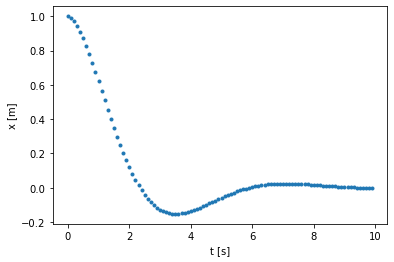

In [16]:
# 【解答用セル2-2】
ts, vxs, xs = Euler(Q)

plt.plot(ts, xs, '.')
plt.xlabel('t [s]')
plt.ylabel('x [m]')

Text(0, 0.5, 'v [m/s]')

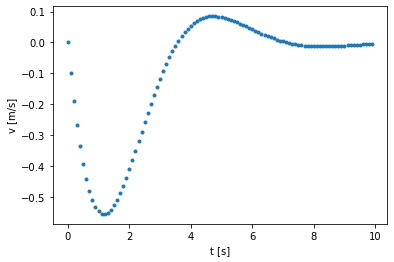

In [18]:
# 【解答用セル2-3】
plt.plot(ts, vxs, '.')
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')

## 課題3

グラフ1とグラフ2の結果を読み解き，シミュレーションされた台車の挙動を説明せよ．解答は【解答用セル3】に記入すること．

> ヒント
>
> 質点の初期位置，初期速度や運動の特徴的な点に着目し，質点がどのように動いたのかを読者にわかるように説明すること．
> また，この系は自由振動系であり，その挙動は[機械力学の教科書](http://edu.katzlab.jp/lec/mdyn/files/mdyn2017text.pdf)のp.123，表13.1のとおりに分類できる．
> その分類と，今回の結果を関連付け，「〇〇であるから〇〇振動であることがわかる」のように説明すること．

【解答用セル3】



## 課題4

【解答用セル4-1】に，数値解析で用いたパラメータ（$m$, $k$, $c$）から系の固有値を算出するPythonプログラムを作成し，算出結果を示せ．

【解答用セル4-2】に，算出結果と課題3のシミュレーション結果を比較して考察せよ．

> ヒント
>
> 自由振動系では，その固有値から運動が理論的に分類できる（忘れた場合は[機械力学の教科書](http://edu.katzlab.jp/lec/mdyn/files/mdyn2017text.pdf)のp.123あたりを読むこと）．
> 理論的な分類と比較したとき，今回のシミュレーション結果は妥当といえるかを考察すること．

In [5]:
# 【解答用セル4-1】


【解答用セル4-2】



## 課題5

この自由振動系では，モデルのパラメータにより6つの振る舞いが生じる．
そろで，課題3で示された振る舞いを除いた5つの振る舞いを，モデルのパラメータを工夫してシミュレーションし，以下に示せ．

In [6]:
# 【解答用セル5，必要に応じてセルを追加してよい．】
